In [1]:
# Importing  required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import requests                                   
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import re 

In [2]:
# All required cities in list format
cities=["Bangalore","Hyderabad","Chennai","Mumbai","Pune","Delhi","Kolkata"]

In [5]:
# coding for getting data
title=[]
specification=[]
exp=[]
area=[]
fee=[]
reviews=[]
stories=[]
availability=[]
Location=[]
Hospital=[]

urls=["https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22dermatologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22pediatrician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22gynecologist%2Fobstetrician%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22dermatologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22cardiologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22fixed%20prosthodontics%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22implantologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22ayurveda%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22psychologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22audiologist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22speech%20therapist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22dietitian%2Fnutritionist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22subspeciality%22%7D%5D&city={}",
      "https://www.practo.com/search/clinics?results_type=clinic&q=%5B%7B%22word%22%3A%22clinikk%20health%20hub%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22practice_group%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22nerves%20surgery%20specialist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22common_name%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22pre%20prosthetic%20surgery%20(rigid%20reconstruction)%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22alopecia%20areta%20treatment%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22gall%20bladder%20(biliary)%20stone%20treatment%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22immunity%20therapy%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22child%20occupational%20therapist%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22common_name%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22chickenpox%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22symptom%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22chickenpox%20treatment%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/procedure?results_type=doctor&q=%5B%7B%22word%22%3A%22epistaxis%20treatment%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22procedure%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22tailbone%20pain%20treatment%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/procedure?results_type=doctor&q=%5B%7B%22word%22%3A%22root%20canal%20treatment%20(rct)%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22procedure%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22scleral%20contact%20lens%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22rectal%20abscess%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22symptom%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22mental%20health%20doctor%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22common_name%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22cardiac%20rehabilitation%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22skin%20care%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22skin%20whitening%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22symptom%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22hair%20loss%20treatment%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/procedure?results_type=doctor&q=%5B%7B%22word%22%3A%22hair%20transplant%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22procedure%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22damon%20system%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22ocular%20manifestation%20of%20disease%20sintemica%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22spheroid%20body%20myopathy%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22symptom%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22doppler%20scan%20in%20pregnancy%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22vaginal%20infection%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22symptom%22%7D%5D&city={}",
      "https://www.practo.com/search/procedure?results_type=doctor&q=%5B%7B%22word%22%3A%22facet%20joint%20injections%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22procedure%22%7D%5D&city={}",
      "https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22joints%20and%20musculoskeletal%20disorders%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22service%22%7D%5D&city={}"]

      
for i in urls:
    for j in cities:
        url=i.format(j)
        page=requests.get(url)
        soup=BeautifulSoup(page.text)
        for x in soup.find_all("div",class_="u-border-general--bottom"):# Container
            Doctor_title=x.find("h2",class_="doctor-name")
            Doctor_specification=x.find("div",class_="u-grey_3-text")
            experience=x.find("div",{'class':"uv2-spacer--xs-top",'data-qa-id':'doctor_experience'})
            city=x.find("span",{'data-qa-id':'practice_locality'})
            fees=x.find("span",{'data-qa-id':"consultation_fee"})
            patient_reviews=x.find("span",class_="o-label--success u-bold")
            patient_stories=x.find("span",class_="u-bold u-t-underline")
            Doctor_availability=x.find("span",{'class':'u-color--green u-bold','data-qa-id':'availability_text'})
            Doctor_Location=x.find("span",{'class':'u-t-capitalize','data-qa-id':'practice_city'})
            Hospital_name=x.find("span",{'class':'u-c-pointer u-t-hover-underline','data-qa-id':'doctor_clinic_name'})

            if Doctor_title is None:
                title.append(np.nan)
            else:
                title.append(Doctor_title.text)
            if Doctor_specification is None:
                specification.append(np.nan)
            else:
                specification.append(Doctor_specification.text)
            if experience is None:
                exp.append(np.nan)
            else:
                exp.append(experience.text)
            if city is None:
                area.append(np.nan)
            else:
                area.append(city.text)
            if fees is None:
                fee.append(np.nan)
            else:
                fee.append(fees.text)
            if patient_reviews is None:
                reviews.append(np.nan)
            else:
                reviews.append(patient_reviews.text)
            if patient_stories is None:
                stories.append(np.nan)
            else:
                stories.append(patient_stories.text)
            if Doctor_availability is None:
                availability.append(np.nan)
            else:
                availability.append(Doctor_availability.text)
            if Doctor_Location is None:
                Location.append(np.nan)
            else:
                Location.append(Doctor_Location.text)
            if Hospital_name is None:
                Hospital.append(np.nan)
            else:
                Hospital.append(Hospital_name.text)
            # Checking the length of Each Column in a Program
print("title----->",len(title))
print("specification----->",len(specification))
print("exp--->",len(exp))
print("area----->",len(area))
print("fee---->",len(fee))
print("reviews---->",len(reviews))
print("stories----->",len(stories))
print("availability---->",len(availability))
print("Location---->",len(Location))
print("Hospital----->",len(Hospital)) 
    
                

title-----> 2857
specification-----> 2857
exp---> 2857
area-----> 2857
fee----> 2857
reviews----> 2857
stories-----> 2857
availability----> 2857
Location----> 2857
Hospital-----> 2857


In [69]:
# Sample Data Frame
df=pd.DataFrame({"Name":title,"Specialization":specification,"Experience":exp,"Hospital_Name":Hospital,"Area":area,"City":Location,"Consultation_Fee":fee,"Doctor_Availability":availability,"Recommondations":reviews,"No_Of_Stories":stories})

ValueError: array length 2857 does not match index length 2500

In [70]:
df 

,Name,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fee,Doctor_Availability,Recommondations,No_Of_Stories
0,NaN,NaN,14 years experience overall,NaN,NaN,NaN,₹500,Available Today,100%,1 Patient Story
1,Dr. Deepak Devakar,Dermatologist19 years experience overall,19 years experience overall,Dermasculpt Hair Transplant and Skin Clinic,"JP Nagar,",Bangalore,₹600,Available Today,98%,580 Patient Stories
2,Dr. Vignessh Raj,Dermatologist16 years experience overall,16 years experience overall,Dr. RAJ's Centre for Skin & Hair,"Whitefield,",Bangalore,₹700,Available Today,98%,286 Patient Stories
3,Dr. Neelima Sharma,Dermatologist24 years experience overall,24 years experience overall,Manipal Hospital,"Jayanagar 9 Block,",Bangalore,₹650,Available Today,95%,27 Patient Stories
4,Dr. Parthasarathi Dutta Roy,Dermatologist20 years experience overall,20 years experience overall,Dr. Partha Sarathi's Asian Hair and Skin Hospi...,"MG Road,",Bangalore,₹700,Available Today,89%,1314 Patient Stories
...,...,...,...,...,...,...,...,...,...,...
2852,Dr. Chayan Kumar Roy,General Physician28 years experience overall,28 years experience overall,Rameswara Nursing Home,"Ultadanga,",Kolkata,₹800,Available Today,100%,1 Patient Story
2853,Dr. Dipayan Das,Homoeopath12 years experience overall,12 years experience overall,The Healers,"Garia,",Kolkata,₹600,Available Today,90%,18 Patient Stories
2854,Dr. Shyama Prasad Roy,General Physician37 years experience overall,37 years experience overall,Binapani Doctor's Chamber,"Jadavpur,",Kolkata,₹700,Available Today,79%,8 Patient Stories
2855,Dr. Sandip Rungta,General Physician23 years experience overall,23 years experience overall,Mansa Sheel,"Beadon Street,",Kolkata,₹700,Available Today,99%,312 Patient Stories


In [10]:
#df.to_csv("doctors.csv") 

# Data Cleaning

In [71]:
# Checking the null values before dropping
df.isnull().sum() 

Name                   357
Specialization         248
Experience               0
Hospital_Name          357
Area                   357
City                   357
Consultation_Fee         0
Doctor_Availability      0
Recommondations          0
No_Of_Stories            0
dtype: int64

In [72]:
# Filling null values for Doctor_Availability
df['Doctor_Availability'].fillna(df['Doctor_Availability'].mode()[0],inplace = True) 

In [73]:
# Filling null values for Recommondations
df['Recommondations'].fillna(df['Recommondations'].mode()[0],inplace = True) 

In [74]:
# Filling null values for no of stories
df['No_Of_Stories'].fillna(df['No_Of_Stories'].mode()[0],inplace=True) 

In [75]:
# Filling null values for consulation fee
df["Consultation_Fee"].fillna(df['Consultation_Fee'].mode()[0],inplace=True) 

In [76]:
# filling null values for experience
df["Experience"].fillna(df['Experience'].mode()[0],inplace=True) 

In [77]:
# Dropping all null values in the sample dataframe
df1=df.dropna(subset=["Name","Specialization","Area","City","Hospital_Name"]) 

In [78]:
# checking null values after droping
df1.isnull().sum() 

Name                   0
Specialization         0
Experience             0
Hospital_Name          0
Area                   0
City                   0
Consultation_Fee       0
Doctor_Availability    0
Recommondations        0
No_Of_Stories          0
dtype: int64

In [79]:
df1 

,Name,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fee,Doctor_Availability,Recommondations,No_Of_Stories
1,Dr. Deepak Devakar,Dermatologist19 years experience overall,19 years experience overall,Dermasculpt Hair Transplant and Skin Clinic,"JP Nagar,",Bangalore,₹600,Available Today,98%,580 Patient Stories
2,Dr. Vignessh Raj,Dermatologist16 years experience overall,16 years experience overall,Dr. RAJ's Centre for Skin & Hair,"Whitefield,",Bangalore,₹700,Available Today,98%,286 Patient Stories
3,Dr. Neelima Sharma,Dermatologist24 years experience overall,24 years experience overall,Manipal Hospital,"Jayanagar 9 Block,",Bangalore,₹650,Available Today,95%,27 Patient Stories
4,Dr. Parthasarathi Dutta Roy,Dermatologist20 years experience overall,20 years experience overall,Dr. Partha Sarathi's Asian Hair and Skin Hospi...,"MG Road,",Bangalore,₹700,Available Today,89%,1314 Patient Stories
5,Dr. Jyothi Menon,Dermatologist22 years experience overall,22 years experience overall,Oliva Skin & Hair Clinic,"Koramangala 7 Block,",Bangalore,₹600,Available Today,96%,33 Patient Stories
...,...,...,...,...,...,...,...,...,...,...
2852,Dr. Chayan Kumar Roy,General Physician28 years experience overall,28 years experience overall,Rameswara Nursing Home,"Ultadanga,",Kolkata,₹800,Available Today,100%,1 Patient Story
2853,Dr. Dipayan Das,Homoeopath12 years experience overall,12 years experience overall,The Healers,"Garia,",Kolkata,₹600,Available Today,90%,18 Patient Stories
2854,Dr. Shyama Prasad Roy,General Physician37 years experience overall,37 years experience overall,Binapani Doctor's Chamber,"Jadavpur,",Kolkata,₹700,Available Today,79%,8 Patient Stories
2855,Dr. Sandip Rungta,General Physician23 years experience overall,23 years experience overall,Mansa Sheel,"Beadon Street,",Kolkata,₹700,Available Today,99%,312 Patient Stories


In [45]:
#df1.to_csv("practo_cleaning.csv")

In [80]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1 to 2856
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 2500 non-null   object
 1   Specialization       2500 non-null   object
 2   Experience           2500 non-null   object
 3   Hospital_Name        2500 non-null   object
 4   Area                 2500 non-null   object
 5   City                 2500 non-null   object
 6   Consultation_Fee     2500 non-null   object
 7   Doctor_Availability  2500 non-null   object
 8   Recommondations      2500 non-null   object
 9   No_Of_Stories        2500 non-null   object
dtypes: object(10)
memory usage: 214.8+ KB


In [81]:
# removing unwanted data for Experience
exp=df1['Experience'].apply(lambda x:x.replace("years experience overall",""))

In [115]:
# removing unwanted data for Consultation_Fee
fee=df1["Consultation_Fee"].apply(lambda x:x.replace("₹","").replace('Free Consultation',"0"))

In [83]:
# removing unwanted data for recommondetions
rate=df1["Recommondations"].apply(lambda x:x.replace("%","")) 

In [107]:
# removing unwanted data for no_of_stories
stories=df1["No_Of_Stories"].apply(lambda x:x.replace("Patient Stories","").replace("Patient Story","")) 

In [85]:
# removing unwanted data for area
are=df1["Area"].apply(lambda x:x.replace(",","")) 

In [86]:
# removing unwanted data for specialization 
spc=df1["Specialization"].apply(lambda x: str(re.findall("Dentist|Gynecologist\/Obstetrician|General Physician|Ear-Nose-Throat \(ENT\)|Ayurveda|Dermatologist|Homoeopath",str(x))).replace('[',"").replace(']',"").replace("'",""))

In [87]:
#removing unwanted data for availability
avail=df1["Doctor_Availability"].apply(lambda x:x.replace("Available",""))

In [90]:
# calling hospital name
hsp = df1["Hospital_Name"]
hsp 

1             Dermasculpt Hair Transplant and Skin Clinic
2                        Dr. RAJ's Centre for Skin & Hair
3                                        Manipal Hospital
4       Dr. Partha Sarathi's Asian Hair and Skin Hospi...
5                                Oliva Skin & Hair Clinic
                              ...                        
2852                               Rameswara Nursing Home
2853                                          The Healers
2854                            Binapani Doctor's Chamber
2855                                          Mansa Sheel
2856                        Ashok Polyclinic Nursing Home
Name: Hospital_Name, Length: 2500, dtype: object

In [91]:
# calling names
na=df1["Name"]
na 

1                Dr. Deepak Devakar
2                  Dr. Vignessh Raj
3                Dr. Neelima Sharma
4       Dr. Parthasarathi Dutta Roy
5                  Dr. Jyothi Menon
                   ...             
2852           Dr. Chayan Kumar Roy
2853                Dr. Dipayan Das
2854          Dr. Shyama Prasad Roy
2855              Dr. Sandip Rungta
2856          Dr. Bappaditya Sarkar
Name: Name, Length: 2500, dtype: object

In [92]:
# calling place
pla = df1["City"]
pla 

1       Bangalore
2       Bangalore
3       Bangalore
4       Bangalore
5       Bangalore
          ...    
2852      Kolkata
2853      Kolkata
2854      Kolkata
2855      Kolkata
2856      Kolkata
Name: City, Length: 2500, dtype: object

In [116]:
# After Cleaning the Data Storing the Values In a Another Data Frame
# Sample01 Data Frame
df2=pd.DataFrame({"Names":na,"Specialization":spc,"Experience":exp,"Hospital_Name":hsp,"Area":are,'City':pla,"Consultation_Fees":fee,"Doctor_recommondations":rate,"Patient_stories":stories,"Doctor_availability":avail})

In [117]:
df2 

,Names,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fees,Doctor_recommondations,Patient_stories,Doctor_availability
1,Dr. Deepak Devakar,Dermatologist,19,Dermasculpt Hair Transplant and Skin Clinic,JP Nagar,Bangalore,600,98,580,Today
2,Dr. Vignessh Raj,Dermatologist,16,Dr. RAJ's Centre for Skin & Hair,Whitefield,Bangalore,700,98,286,Today
3,Dr. Neelima Sharma,Dermatologist,24,Manipal Hospital,Jayanagar 9 Block,Bangalore,650,95,27,Today
4,Dr. Parthasarathi Dutta Roy,Dermatologist,20,Dr. Partha Sarathi's Asian Hair and Skin Hospi...,MG Road,Bangalore,700,89,1314,Today
5,Dr. Jyothi Menon,Dermatologist,22,Oliva Skin & Hair Clinic,Koramangala 7 Block,Bangalore,600,96,33,Today
...,...,...,...,...,...,...,...,...,...,...
2852,Dr. Chayan Kumar Roy,General Physician,28,Rameswara Nursing Home,Ultadanga,Kolkata,800,100,1,Today
2853,Dr. Dipayan Das,Homoeopath,12,The Healers,Garia,Kolkata,600,90,18,Today
2854,Dr. Shyama Prasad Roy,General Physician,37,Binapani Doctor's Chamber,Jadavpur,Kolkata,700,79,8,Today
2855,Dr. Sandip Rungta,General Physician,23,Mansa Sheel,Beadon Street,Kolkata,700,99,312,Today


In [110]:
#df2.to_csv("practo_progress.csv") 

In [118]:
#df2.to_csv("practo_progress1.csv")

In [132]:
# reading csv data
df3=pd.read_csv("practo_progress1.csv",index_col=0)
df3

,Names,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fees,Doctor_recommondations,Patient_stories,Doctor_availability
1,Dr. Deepak Devakar,Dermatologist,19,Dermasculpt Hair Transplant and Skin Clinic,JP Nagar,Bangalore,600,98,580,Today
2,Dr. Vignessh Raj,Dermatologist,16,Dr. RAJ's Centre for Skin & Hair,Whitefield,Bangalore,700,98,286,Today
3,Dr. Neelima Sharma,Dermatologist,24,Manipal Hospital,Jayanagar 9 Block,Bangalore,650,95,27,Today
4,Dr. Parthasarathi Dutta Roy,Dermatologist,20,Dr. Partha Sarathi's Asian Hair and Skin Hospi...,MG Road,Bangalore,700,89,1314,Today
5,Dr. Jyothi Menon,Dermatologist,22,Oliva Skin & Hair Clinic,Koramangala 7 Block,Bangalore,600,96,33,Today
...,...,...,...,...,...,...,...,...,...,...
2852,Dr. Chayan Kumar Roy,General Physician,28,Rameswara Nursing Home,Ultadanga,Kolkata,800,100,1,Today
2853,Dr. Dipayan Das,Homoeopath,12,The Healers,Garia,Kolkata,600,90,18,Today
2854,Dr. Shyama Prasad Roy,General Physician,37,Binapani Doctor's Chamber,Jadavpur,Kolkata,700,79,8,Today
2855,Dr. Sandip Rungta,General Physician,23,Mansa Sheel,Beadon Street,Kolkata,700,99,312,Today


In [133]:
# Dropping all null values in the  Above dataframe
df4=df3.dropna(subset=["Names","Specialization","Experience","Hospital_Name","Area","City","Consultation_Fees","Doctor_recommondations","Patient_stories","Doctor_availability"])

In [134]:
df4 

,Names,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fees,Doctor_recommondations,Patient_stories,Doctor_availability
1,Dr. Deepak Devakar,Dermatologist,19,Dermasculpt Hair Transplant and Skin Clinic,JP Nagar,Bangalore,600,98,580,Today
2,Dr. Vignessh Raj,Dermatologist,16,Dr. RAJ's Centre for Skin & Hair,Whitefield,Bangalore,700,98,286,Today
3,Dr. Neelima Sharma,Dermatologist,24,Manipal Hospital,Jayanagar 9 Block,Bangalore,650,95,27,Today
4,Dr. Parthasarathi Dutta Roy,Dermatologist,20,Dr. Partha Sarathi's Asian Hair and Skin Hospi...,MG Road,Bangalore,700,89,1314,Today
5,Dr. Jyothi Menon,Dermatologist,22,Oliva Skin & Hair Clinic,Koramangala 7 Block,Bangalore,600,96,33,Today
...,...,...,...,...,...,...,...,...,...,...
2851,Dr. Chinmay Mahanta,Homoeopath,19,Dr Batra's Positive Health Clinic Pvt Ltd,Kolkatta,Kolkata,450,100,1,Today
2852,Dr. Chayan Kumar Roy,General Physician,28,Rameswara Nursing Home,Ultadanga,Kolkata,800,100,1,Today
2853,Dr. Dipayan Das,Homoeopath,12,The Healers,Garia,Kolkata,600,90,18,Today
2854,Dr. Shyama Prasad Roy,General Physician,37,Binapani Doctor's Chamber,Jadavpur,Kolkata,700,79,8,Today


In [135]:
df4.isnull().sum()

Names                     0
Specialization            0
Experience                0
Hospital_Name             0
Area                      0
City                      0
Consultation_Fees         0
Doctor_recommondations    0
Patient_stories           0
Doctor_availability       0
dtype: int64

# Type casting

In [136]:
import warnings
warnings.filterwarnings("ignore")

In [137]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065 entries, 1 to 2855
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Names                   1065 non-null   object
 1   Specialization          1065 non-null   object
 2   Experience              1065 non-null   object
 3   Hospital_Name           1065 non-null   object
 4   Area                    1065 non-null   object
 5   City                    1065 non-null   object
 6   Consultation_Fees       1065 non-null   int64 
 7   Doctor_recommondations  1065 non-null   int64 
 8   Patient_stories         1065 non-null   object
 9   Doctor_availability     1065 non-null   object
dtypes: int64(2), object(8)
memory usage: 91.5+ KB


In [138]:
df4["Patient_stories"]=df4["Patient_stories"].astype("int") 

In [139]:
df4['Experience'] = df4["Experience"].astype("int")

In [140]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065 entries, 1 to 2855
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Names                   1065 non-null   object
 1   Specialization          1065 non-null   object
 2   Experience              1065 non-null   int32 
 3   Hospital_Name           1065 non-null   object
 4   Area                    1065 non-null   object
 5   City                    1065 non-null   object
 6   Consultation_Fees       1065 non-null   int64 
 7   Doctor_recommondations  1065 non-null   int64 
 8   Patient_stories         1065 non-null   int32 
 9   Doctor_availability     1065 non-null   object
dtypes: int32(2), int64(2), object(6)
memory usage: 83.2+ KB


In [142]:
# Saving the Cleand Data Frame into CSV File
#df4.to_csv('practo_cleaned.csv')

# Data Visulaization

1. univariate - cat, num
2. bi variate - cat vs num, num vs num, cat vs cat
3. multi variate - heat map, 

In [26]:
# Reading the Cleaned Data Frame
p = pd.read_csv('practo_cleaned.csv',index_col=0)
p 

,Names,Specialization,Experience,Hospital_Name,Area,City,Consultation_Fees,Doctor_recommondations,Patient_stories,Doctor_availability
1,Dr. Deepak Devakar,Dermatologist,19,Dermasculpt Hair Transplant and Skin Clinic,JP Nagar,Bangalore,600,98,580,Today
2,Dr. Vignessh Raj,Dermatologist,16,Dr. RAJ's Centre for Skin & Hair,Whitefield,Bangalore,700,98,286,Today
3,Dr. Neelima Sharma,Dermatologist,24,Manipal Hospital,Jayanagar 9 Block,Bangalore,650,95,27,Today
4,Dr. Parthasarathi Dutta Roy,Dermatologist,20,Dr. Partha Sarathi's Asian Hair and Skin Hospi...,MG Road,Bangalore,700,89,1314,Today
5,Dr. Jyothi Menon,Dermatologist,22,Oliva Skin & Hair Clinic,Koramangala 7 Block,Bangalore,600,96,33,Today
...,...,...,...,...,...,...,...,...,...,...
2851,Dr. Chinmay Mahanta,Homoeopath,19,Dr Batra's Positive Health Clinic Pvt Ltd,Kolkatta,Kolkata,450,100,1,Today
2852,Dr. Chayan Kumar Roy,General Physician,28,Rameswara Nursing Home,Ultadanga,Kolkata,800,100,1,Today
2853,Dr. Dipayan Das,Homoeopath,12,The Healers,Garia,Kolkata,600,90,18,Today
2854,Dr. Shyama Prasad Roy,General Physician,37,Binapani Doctor's Chamber,Jadavpur,Kolkata,700,79,8,Today


# UNIVARIENT  PLOT

In [3]:
p["Specialization"].value_counts()

Dermatologist                280
Dentist                      259
Gynecologist/Obstetrician    210
General Physician            132
Ayurveda                      95
Homoeopath                    67
Ear-Nose-Throat (ENT)         22
Name: Specialization, dtype: int64

In [12]:
p["Hospital_Name"].mode()

0    Dr Batra's Positive Health Clinic Pvt Ltd
Name: Hospital_Name, dtype: object

In [4]:
p["Consultation_Fees"].max()

4300

In [5]:
p["Consultation_Fees"].min()

0

In [6]:
p["Consultation_Fees"].mean() 

681.8056338028169

In [151]:
p["Patient_stories"].mean()

161.33239436619718

In [20]:
p.groupby(['Specialization','City'])['Consultation_Fees'].aggregate(['min','max','mean'])

min   max         mean
Specialization            City                              
Ayurveda                  Bangalore   200   750   403.333333
                          Chennai     250   750   473.333333
                          Delhi        50  1500   804.545455
                          Hyderabad    99   500   436.181818
                          Kolkata      99   800   530.615385
                          Mumbai      299  2000   783.250000
                          Pune        200   500   398.611111
Dentist                   Bangalore   200   550   481.250000
                          Chennai     150  1800   478.750000
                          Delhi       400  1500   632.500000
                          Hyderabad     0   750   486.250000
                          Kolkata     300  1150   618.333333
                          Mumbai      300  2000   623.437500
                          Pune        150   500   447.297297
Dermatologist             Bangalore   500  1000   692.045455
                          Chennai     350  1000   681.081081
                          Delhi       600  2000  1056.818182
                          Hyderabad   400   800   636.904762
                          Kolkata     500  1000   634.210526
                          Mumbai      500  1700  1010.256410
                          Pune        500   900   630.555556
Ear-Nose-Throat (ENT)     Bangalore   750  1000   814.285714
                          Delhi       700  1500  1060.000000
                          Hyderabad   800   800   800.000000
                          Mumbai     1000  1300  1166.666667
                          Pune        300   300   300.000000
General Physician         Bangalore   400  1000   635.000000
                          Chennai     300   750   568.421053
                          Delhi       500  1800   957.894737
                          Hyderabad   450  1000   652.777778
                          Kolkata     500  1200   819.444444
                          Mumbai      500  4300  1273.684211
                          Pune        400  1100   644.736842
Gynecologist/Obstetrician Bangalore   500  1050   725.000000
                          Chennai     300  1000   635.000000
                          Delhi       500  2000  1013.333333
                          Hyderabad   350  1000   590.000000
                          Kolkata     500  1200   823.333333
                          Mumbai      800  1600  1116.666667
                          Pune        400   900   593.333333
Homoeopath                Bangalore   650   650   650.000000
                          Chennai     300   450   420.000000
                          Delhi       400   700   520.000000
                          Hyderabad    51   700   316.916667
                          Kolkata     450   600   462.500000
                          Mumbai      450  1500   631.250000
                          Pune        300  1000   566.666667

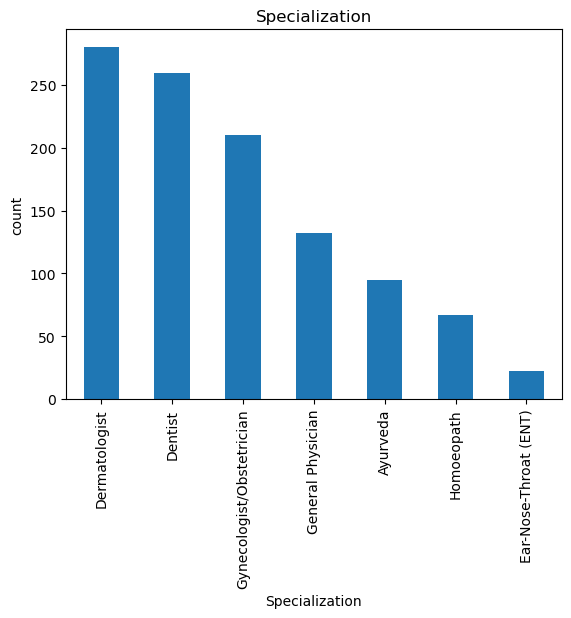

In [153]:
# Using Bar graph for Doctor_specialization
p["Specialization"].value_counts().plot.bar()
plt.xlabel('Specialization')
plt.ylabel('count')
plt.title('Specialization')
plt.show()


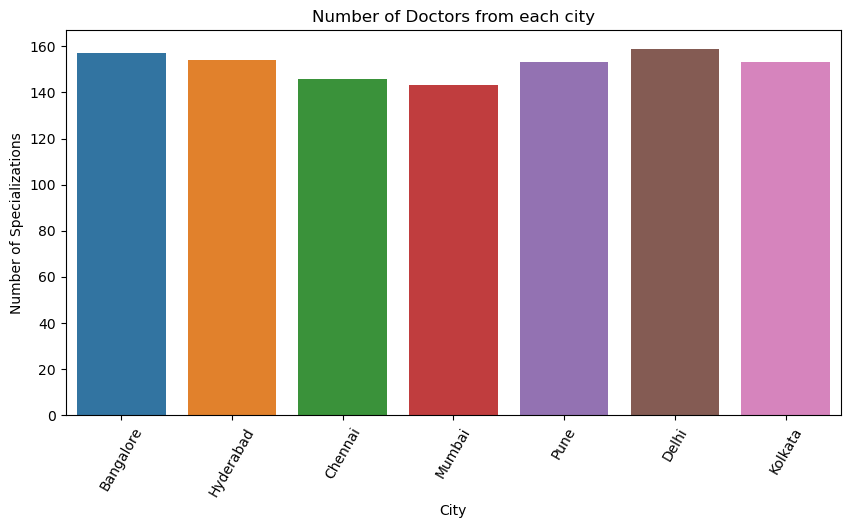

In [22]:
# using countplot for displaying city wise doctor specilizations 
plt.figure(figsize=(10,5)) 
sns.countplot(x='City',data=p) 
plt.title('Number of Doctors from each city')  
plt.ylabel('Number of Specializations') 
plt.xlabel('City') 
plt.xticks(rotation = 60)  
plt.show() 

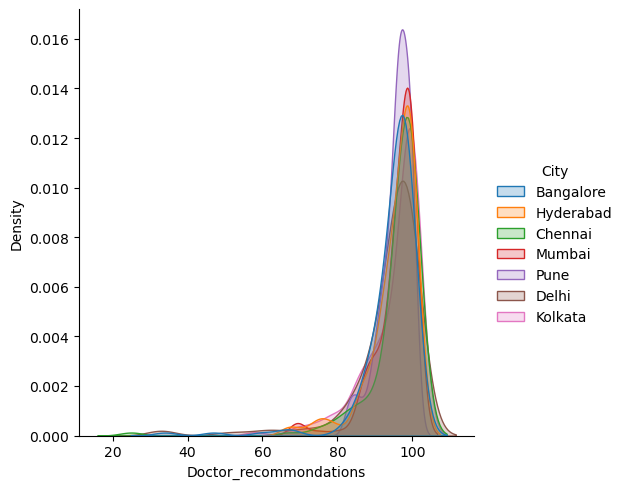

In [50]:
# diplot for displaying citywise doctors sucessrate 
sns.displot(p,x="Doctor_recommondations",hue="City",kind="kde",fill=True) 

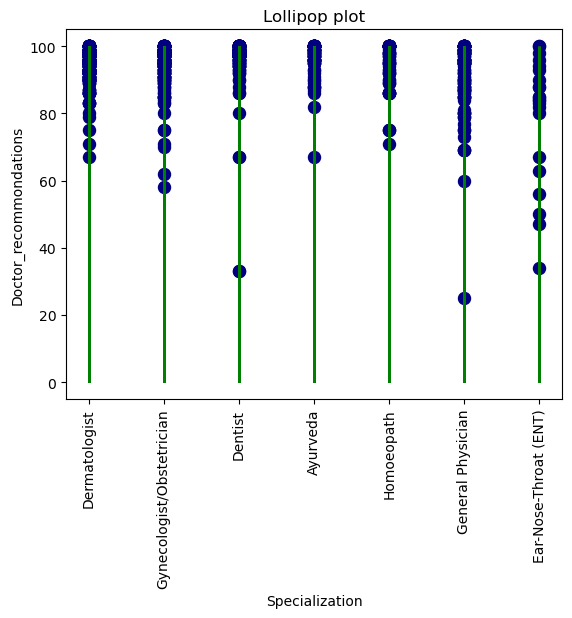

In [24]:
# using lollipop plot to display Doctors sucessrate along with specializations
fig, ax = plt.subplots()
ax.vlines(x=p["Specialization"],ymin=0,ymax=p["Doctor_recommondations"],color="Green",linewidth=2)
ax.scatter(x=p["Specialization"],y=p["Doctor_recommondations"],s=75,color="navy")
ax.set_xlabel("Specialization")
ax.set_ylabel("Doctor_recommondations")
ax.set_title("Lollipop plot")
plt.xticks(rotation=90)
plt.show()

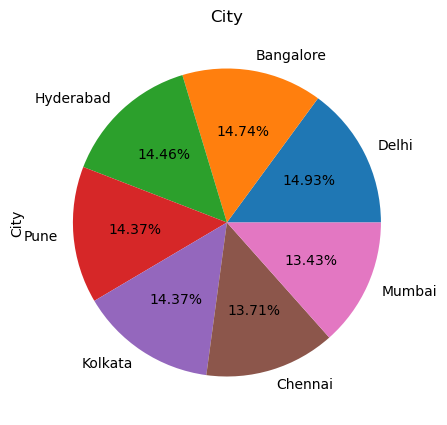

In [154]:
    # Pie Chart for City
    plt.figure(figsize=(5,5))
    p['City'].value_counts().plot.pie(autopct="%.2f%%")
    plt.title('City')
    plt.show()

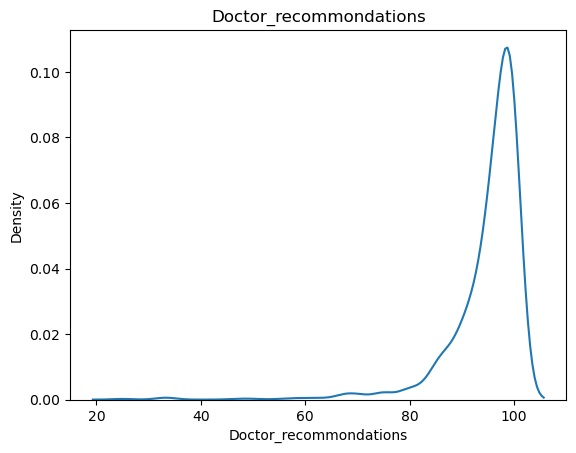

In [155]:
#  Density plot for Doctor_recommondations
sns.kdeplot(p['Doctor_recommondations'])
plt.title('Doctor_recommondations')
plt.show() 

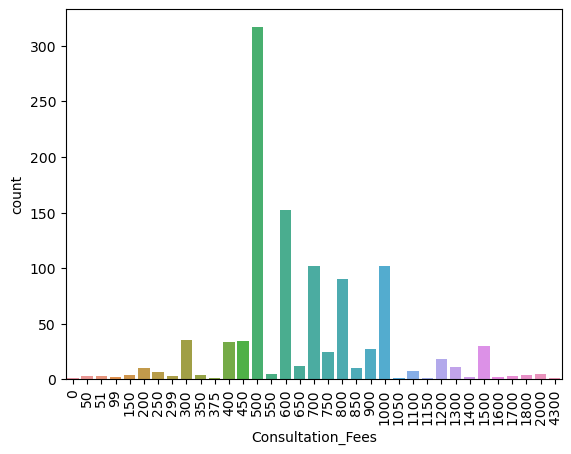

In [156]:
# Consultation_Fees
sns.countplot(p['Consultation_Fees'])
plt.xticks(rotation=90)
plt.show();

Text(0.5, 1.0, 'Experience')

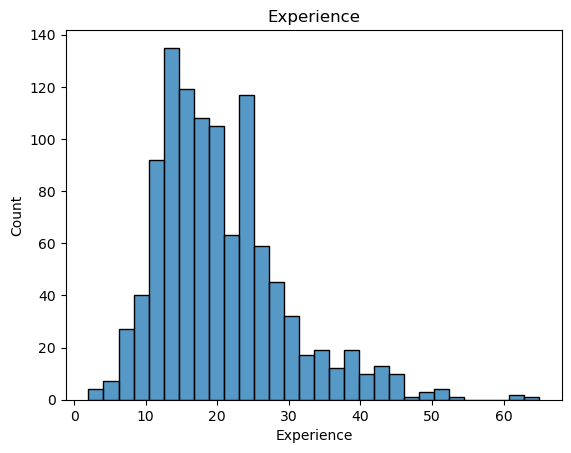

In [157]:
# Doctor_experience
sns.histplot(p["Experience"])
plt.title('Experience')

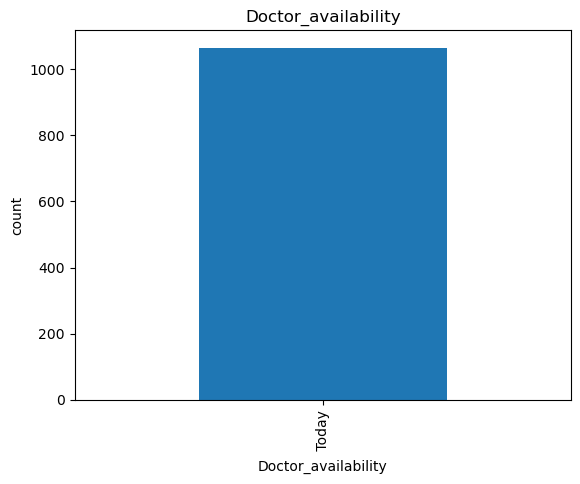

In [158]:
# Using Bar graph for Doctor_availability
p["Doctor_availability"].value_counts().plot.bar()
plt.xlabel('Doctor_availability')
plt.ylabel('count')
plt.title('Doctor_availability')
plt.show() 

# Bivariate

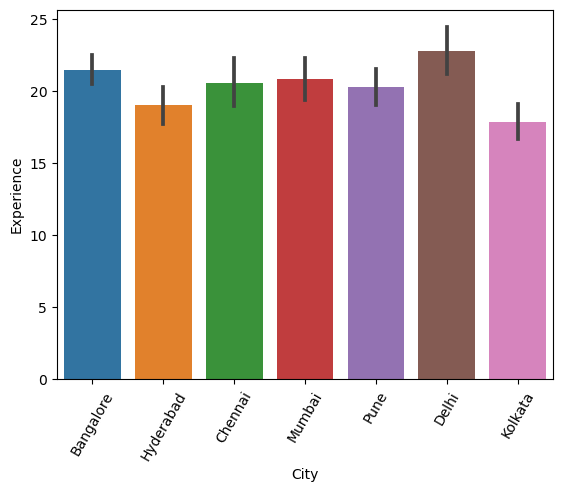

In [37]:
# using barplot for displaying citywise doctors experience
sns.barplot(x="City",y="Experience",data=p)
plt.xticks(rotation=60)
plt.show() 

Text(0.5, 1.0, 'City vs Specialization')

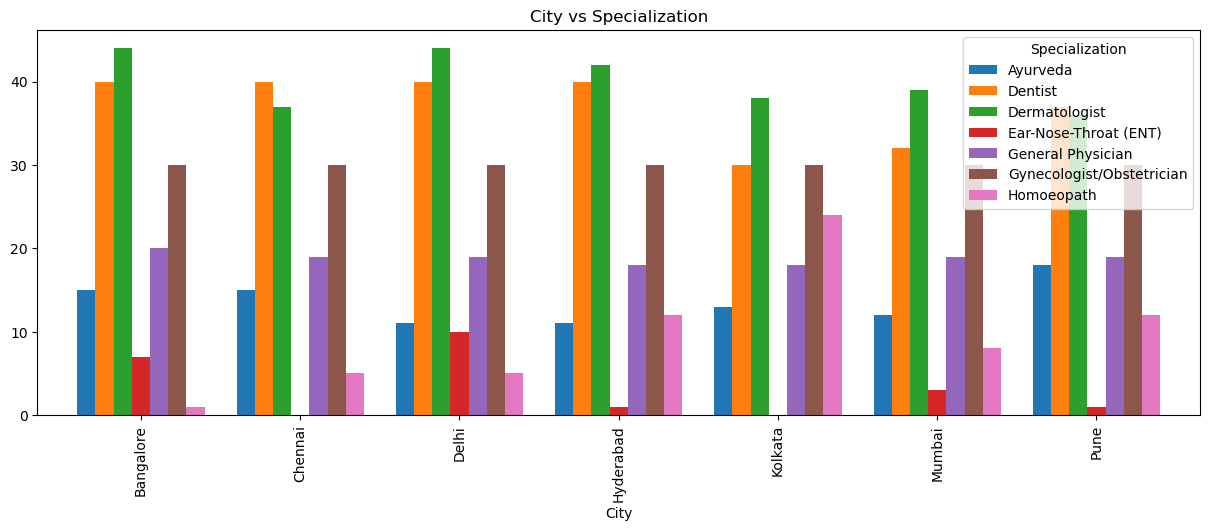

In [159]:
# using crosstab for displaying citywise specializations
fig,ax=plt.subplots(figsize=(15,5))
pd.crosstab(p["City"],p["Specialization"]).plot(kind="bar",ax=ax,width=0.8)
plt.title('City vs Specialization')

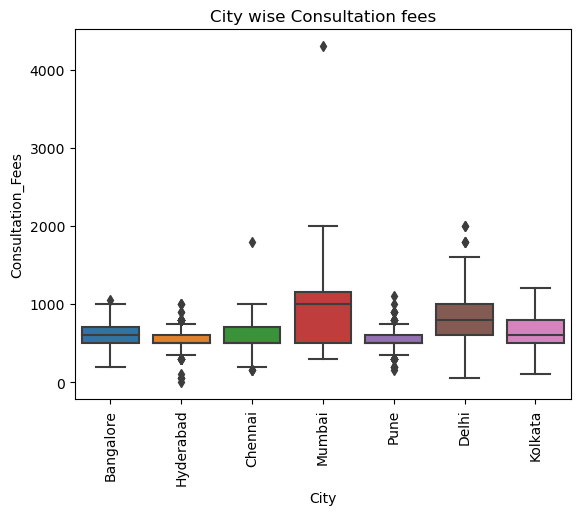

In [51]:
#### code here
sns.boxplot(x='City',y='Consultation_Fees', data=p)
plt.title('City wise Consultation fees')
plt.xlabel('City')
plt.ylabel('Consultation_Fees')
plt.xticks(rotation=90)
plt.show()

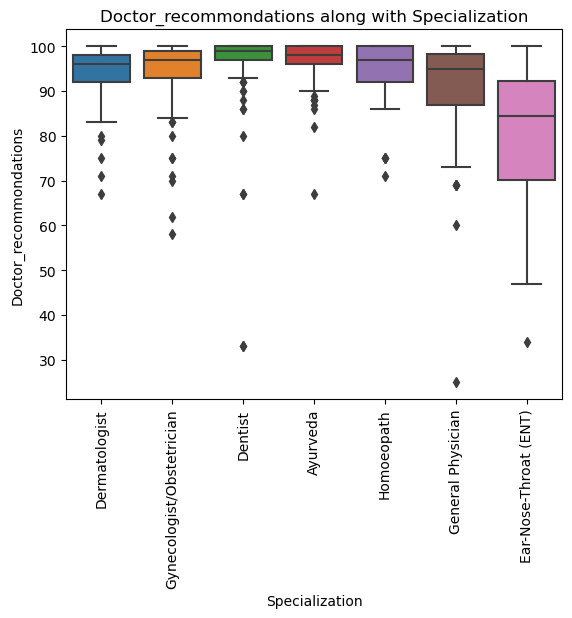

In [33]:
#### code here
sns.boxplot(x='Specialization',y='Doctor_recommondations', data=p)
plt.title('Doctor_recommondations along with Specialization')
plt.xlabel('Specialization') 
plt.ylabel('Doctor_recommondations')
plt.xticks(rotation=90)
plt.show()          

In [42]:
import warnings
warnings.filterwarnings('ignore') 

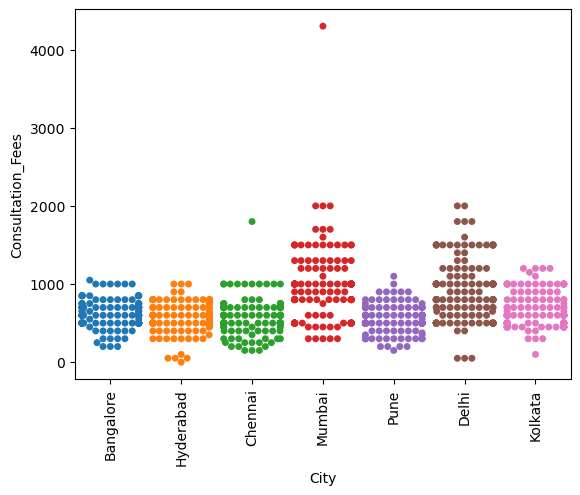

In [46]:
# showing cities wise consultation fees 
sns.swarmplot(x="City",y="Consultation_Fees",data=p)
plt.xticks(rotation=90)
plt.show() 

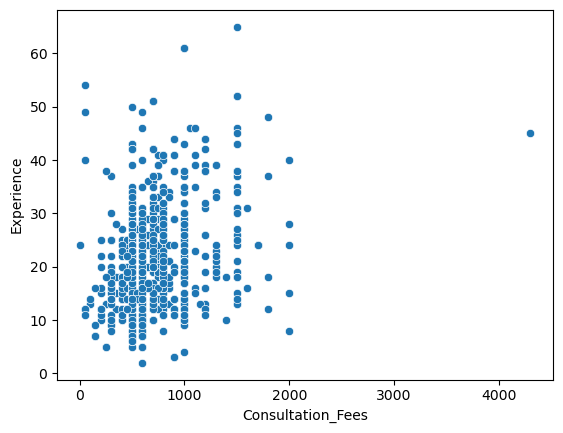

In [160]:
sns.scatterplot(x='Consultation_Fees',y='Experience',data=p)
plt.show()

Text(0.5, 1.0, 'City vs Doctor_specialization')

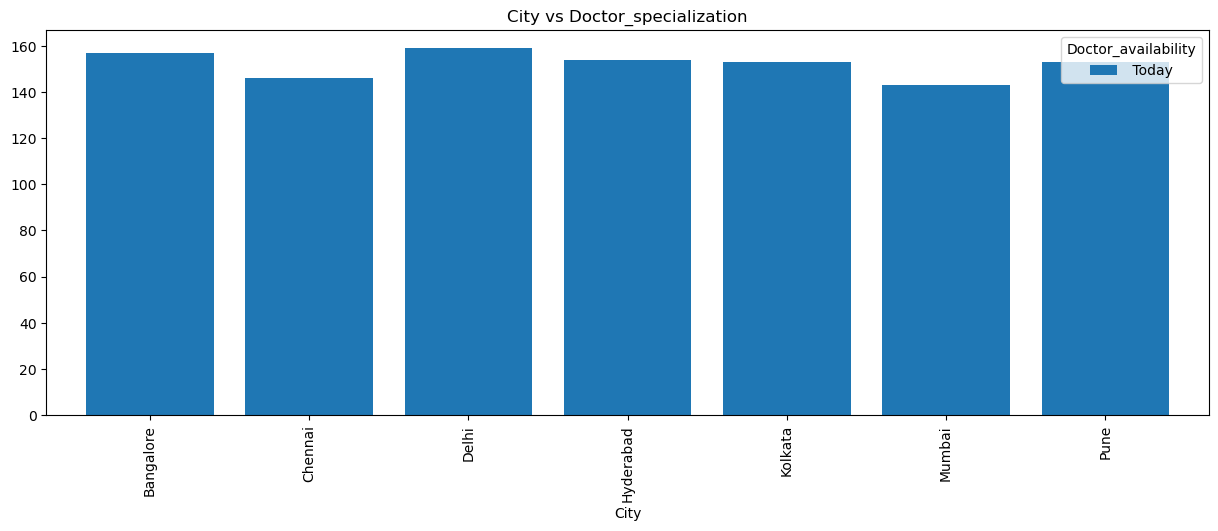

In [162]:
# using crosstab for displaying citywise doctor availability
fig,ax=plt.subplots(figsize=(15,5))
pd.crosstab(p["City"],p["Doctor_availability"]).plot(kind="bar",ax=ax,width=0.8)
plt.title('City vs Doctor_specialization') 

# Multivariate 

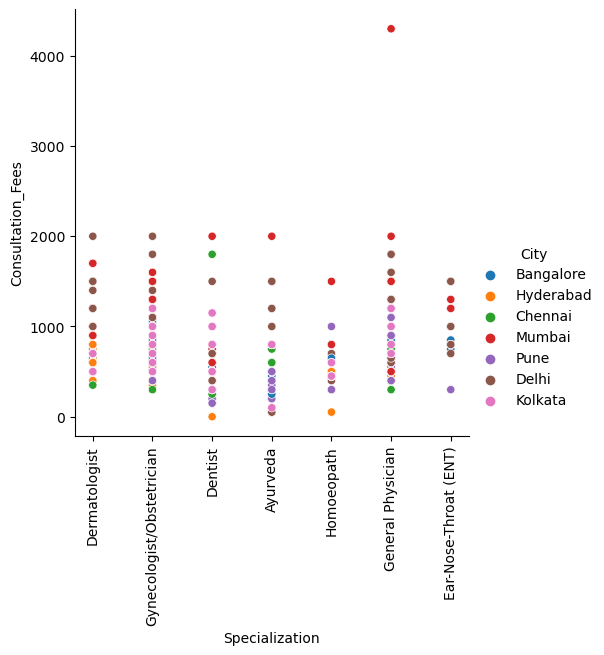

In [29]:
### code here
# Numeric to Numeric to Categorical Scatter plot
sns.relplot(x='Specialization',y='Consultation_Fees',hue='City',data=p)
plt.xticks(rotation=90)
plt.show() 

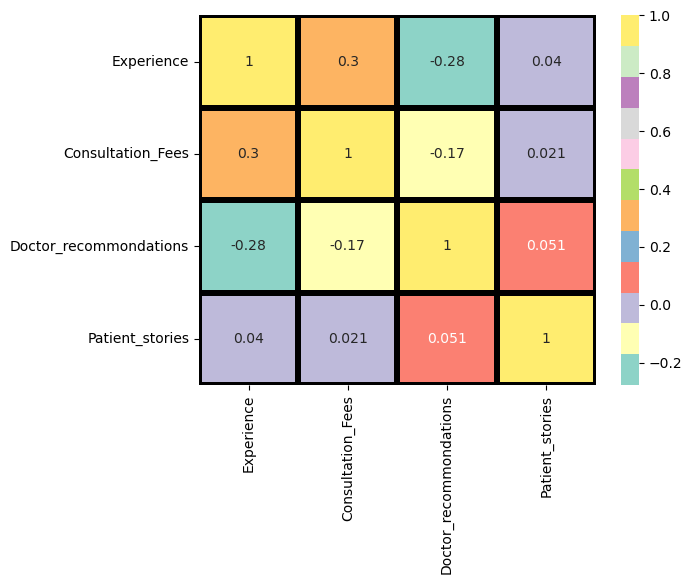

In [163]:
# Heatmap plot
sns.heatmap(p.corr(),annot=True,cmap="Set3",linecolor="black",linewidth=4)
plt.show();

# conclusions
1. As we observe ,in most of the cities dermotologists are more in number.
2. For each specialist ,their consultation fee  is effected by their work experience. 
        In our data general physician has more consultation fee.so that we can clearly say that he has more experience compare         to others.
3. Based on the sucessrate of each doctor we can recommand to respective doctor based on health conditions.
4. By seeing patient stories anyone can get clear idea about each doctor how effectivly his/her treatment makes the patients speed recovery.